<br>
#### 1. 단어의 검색 결과 출력하기
- dictionary.com 에 ‘happniess’ 단어를 검색하였을 때 출력 되는 화면에서 단어와 단어의 의미를 출력한다

In [1]:
# pip install bs4

from bs4 import BeautifulSoup 
from urllib.request import urlopen # (python2) from urllib2 import urlopen

In [2]:
# 검색하고 싶은 단어 입력하기
word = 'happiness'

# 불러오려는 url 입력하기 
# 디폴트 url에 string 타입의 word 변수를 합쳐서 url 변수 생성
url = 'http://www.dictionary.com/browse/' + word

# urlopen 함수를 통해 web 변수를 생성
web = urlopen(url)   # urlopen(url).read().decode('utf-8')

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
web_page = BeautifulSoup(web, 'html.parser')

#### Parser 들의 장단점
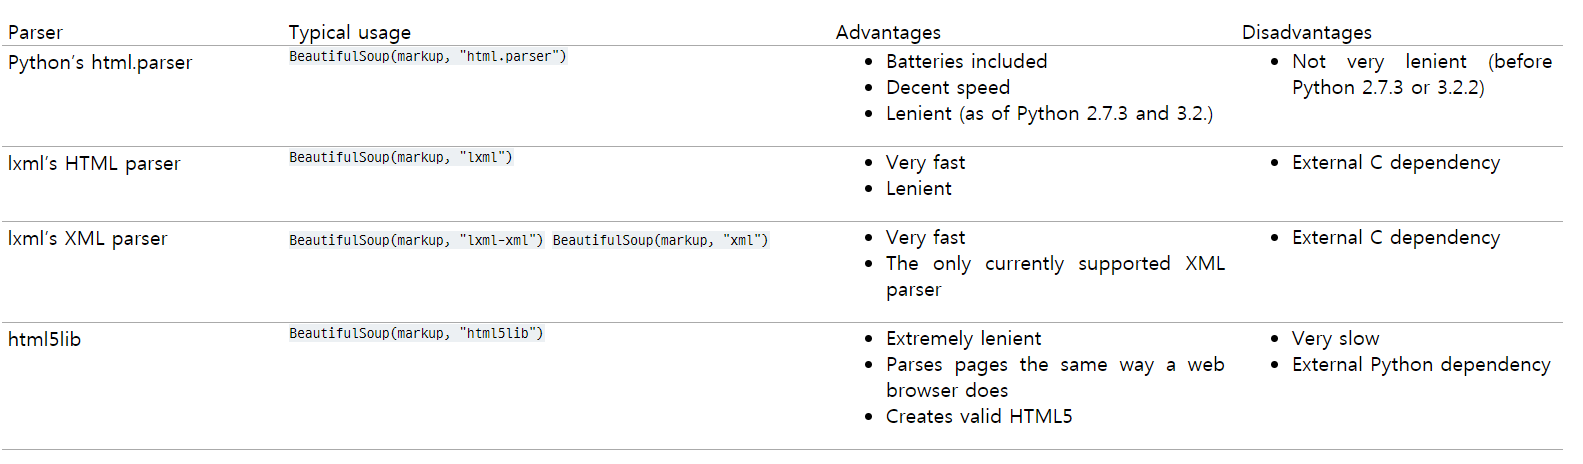

**Scraping에서 Parsing이란?**
- HTML이나 XML, JavaScript 등으로 쓰여진 소스들을 각 요소별로 나누는 것
- 이 때, 이러한 parsing을 진행해주는 것을 parser라고 부른다.

In [3]:
# 찾는 단어 (대상이 하나일 때 : find())
box1 = web_page.find('h1', {'class': 'css-urzbm0'}) 
box1

<h1 class="css-urzbm0 e1rg2mtf5">happiness</h1>

In [4]:
# 단어의 뜻 (대상이 여러개일 때 : find_all())
box2 = web_page.find_all('span', {'class': 'css-4x41l7'}) # 모두 찾다
box2

[<span class="css-4x41l7 e10vl5dg6">the quality or state of being <a class="luna-xref" data-linkid="nn1ov4" href="/browse/happy">happy</a>.</span>,
 <span class="css-4x41l7 e10vl5dg6">good fortune; pleasure; contentment; joy.</span>]

In [6]:
# 단어와 단어의 뜻 출력하기 (get_text()를 활용)

print(box1.get_text())
print()

for defintion in web_page.find_all('span', {'class': 'css-4x41l7'}):
    print(defintion.get_text().strip()) # 앞부분의 공백을 지워주기 위해 strip() 적용

happiness

the quality or state of being happy.
good fortune; pleasure; contentment; joy.


<br>
#### 크롬 확장프로그램 Pesticide 활용하기 @ https://goo.gl/iMhdPU 
- div 구획을 알려줌
- 크롤링을 위한 class & id 검출에 활용
- 설치 후 크롬에서 icon을 클릭 
- **Ctrl 키를 누른 상태에서 Hover 시 class & id 정보를 보여줌 **

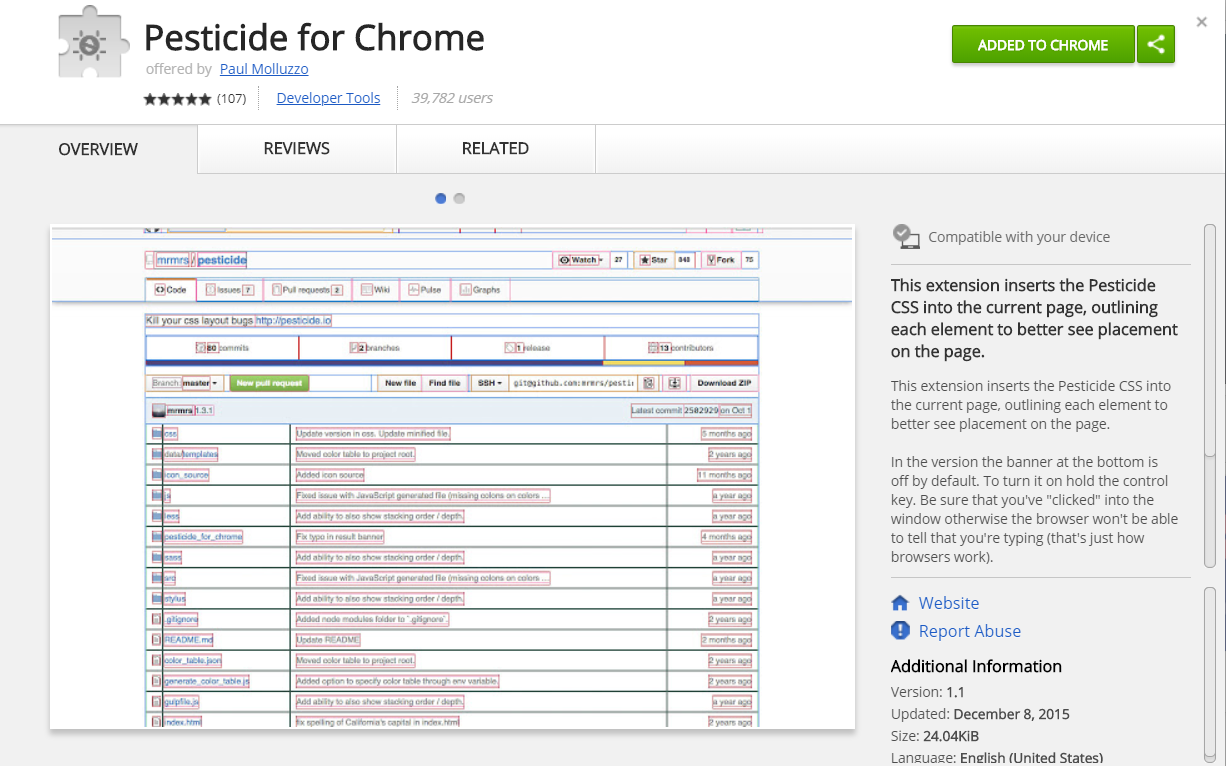

<br>
<br>
#### 2. 영화 정보 출력하기
- IMDb 사이트에서 영화 Guardians of the Galaxy 대한 제목(title)과 감독(director), 그리고 출연 배우(cast)를 출력한다

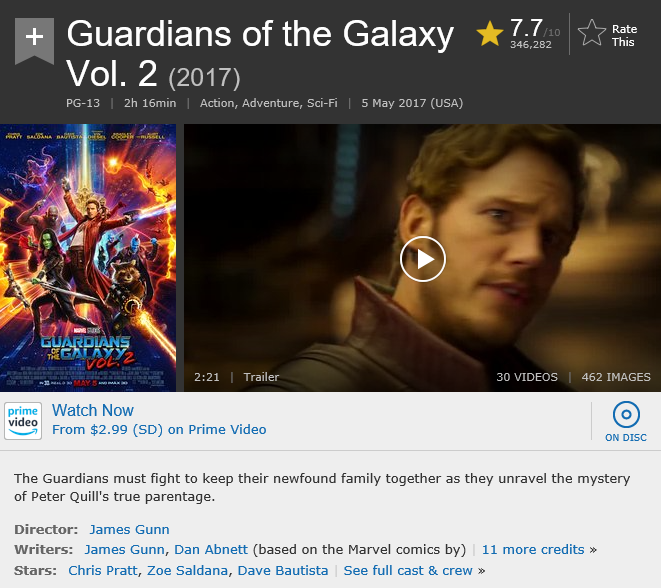

In [23]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

In [24]:
# 불러오려는 url 입력하기 (IMDb - Guardians of the Galaxy Vol. 2 (2017) )
url = 'http://www.imdb.com/title/tt3896198/?ref_=nv_sr_6'

# urlopen 함수를 통해 web 변수를 생성
web = urlopen(url)

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
web_page = BeautifulSoup(web, 'html.parser')

In [25]:
# 영화 제목을 출력한다
title = web_page.find('h1', {'itemprop': 'name'})

print('Movie Title:')
print(title.get_text())

Movie Title:
Guardians of the Galaxy Vol. 2 (2017) 


In [26]:
# 영화 요약을 출력한다
summary = web_page.find('div', {'class': 'summary_text'})

print('Movie Summary:')
print(summary.get_text().strip())

Movie Summary:
The Guardians must fight to keep their newfound family together as they unravel the mystery of Peter Quill's true parentage.


In [27]:
# 감독 이름을 출력한다
director = web_page.find('span', {'itemprop': 'director'})

print('Director:')
print(director.get_text().strip())

Director:
James Gunn


In [30]:
# 출연 배우 이름(들)을 출력한다
stars = web_page.findAll('td', {'itemprop': 'actor'})

print('Stars:')
# for문을 통해 각 배우의 이름을 출력한다
for star in stars:
    print(star.get_text().strip())

Stars:
Chris Pratt
Zoe Saldana
Dave Bautista
Vin Diesel
Bradley Cooper
Michael Rooker
Karen Gillan
Pom Klementieff
Sylvester Stallone
Kurt Russell
Elizabeth Debicki
Chris Sullivan
Sean Gunn
Tommy Flanagan
Laura Haddock


<br>
<br>
#### 3. 영화 리뷰를 출력하고 파일에 저장 하기
- 영화 Guardians of the Galaxy Vol. 2 리뷰 내용을 출력해 보자

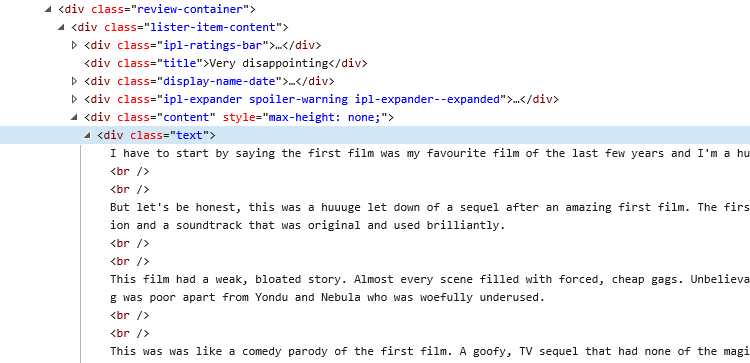

In [31]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [34]:
# 불러오려는 url 입력하기
url = 'http://www.imdb.com/title/tt3896198/reviews?ref_=tt_urv'

# urlopen 함수를 통해 web 변수를 생성
web = urlopen(url)

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
source = BeautifulSoup(web, 'html.parser')

In [40]:
# 리뷰 데이터를 출력하고 파일로 저장한다
reviews = source.find_all('div',{"class":"content"})

with open('moviereview.txt','w', encoding = "utf-8") as f:
    for review in reviews:
        print(review.get_text())
        f.write(review.get_text())


With so much talent in this film, it's so disappointing that the writers were right . Don't waste a dime on developing a sensible plot because the hordes of fans will eat this crap up like it was a 5 star meal. Hence the 8.1 star rating which reflects a demographic with time on their hands and a studio with plenty of marketing budget.On the bright side - the CGI is great. The sets are beautiful. There are some very funny moments. The cast still has some chemistry with each other. And I've seen movies that were much worse and unwatchable than this one. But I wouldn't be honest if I didn't give this a very generous 5 because of the horrendous, deficient plot. And after this film I'd have to say that I've about had enough with this series. We've heard the story, had some fun with the characters and it's clear that what was fun, fresh and original is what it should have been - a one film wonder leaving Hollywood to develop another story. Without giving away the big reveal or true spoilers

<br>
<br>
#### 4. 신문 기사 출력하고 저장하기
- 시애틀의 대표적인 신문 Seattle Times에서 글을 불러와 파일로 저장하기

In [41]:
# 불러오려는 url 입력하기
url = 'https://www.seattletimes.com/business/real-estate/zillows-zestimate-overvalued-a-washington-home-by-700-percent-in-a-case-of-algorithms-gone-wrong/'

# urlopen 함수를 통해 web 변수를 생성
web = urlopen(url)

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
source = BeautifulSoup(web, 'html.parser')

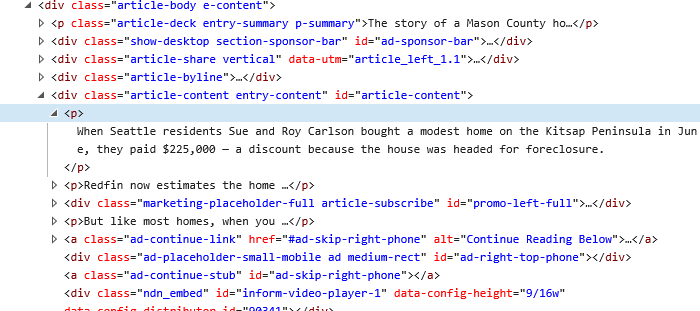

In [42]:
# Settle Times에 기사를 불러온다
with open('seattletimes.txt','w', encoding = 'utf-8') as f:
    
    times = source.find('div',{"class": "article-content"})
    article = times.find_all('p')
    
    for content in article:
        print(content.get_text())
        f.write(content.get_text() + '\n')

When Seattle residents Sue and Roy Carlson bought a modest home on the Kitsap Peninsula in June, they paid $225,000 — a discount because the house was headed for foreclosure.
Redfin now estimates the home in Belfair, southwest of Bremerton, is worth $318,000. Realtor.com’s algorithm pegs the house at $268,000. And the county assessor has valued it at $283,000.
But like most homes, when you Google its address, the first thing that shows up is its Zillow page.
And according to that Zillow page, the home is now worth $1.8 million.
There’s no waterfront access, redevelopment potential or anything else significant about the property — in fact, it needs serious work. So how could an unremarkable three-bedroom home, located in a city where Zillow says the median home costs $286,000, be worth that much?
“I don’t have a clue where they came up with this number,” said Sue Carlson, 70. “It’s not worth anywhere near $1 million. They’re nuts.”
Carlson went on a mission to figure out how her home co

<br>
<br>
#### (Extra) Brunch 기사글 출력하고 저장하기
- 브런치 주간지에 실린 기사을 불러와 파일로 저장하기

In [43]:
# 불러오려는 url 입력하기
url = 'https://brunch.co.kr/@imagineer/267'

# urlopen 함수를 통해 web 변수를 생성
web = urlopen(url)

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
source = BeautifulSoup(web, 'html.parser')

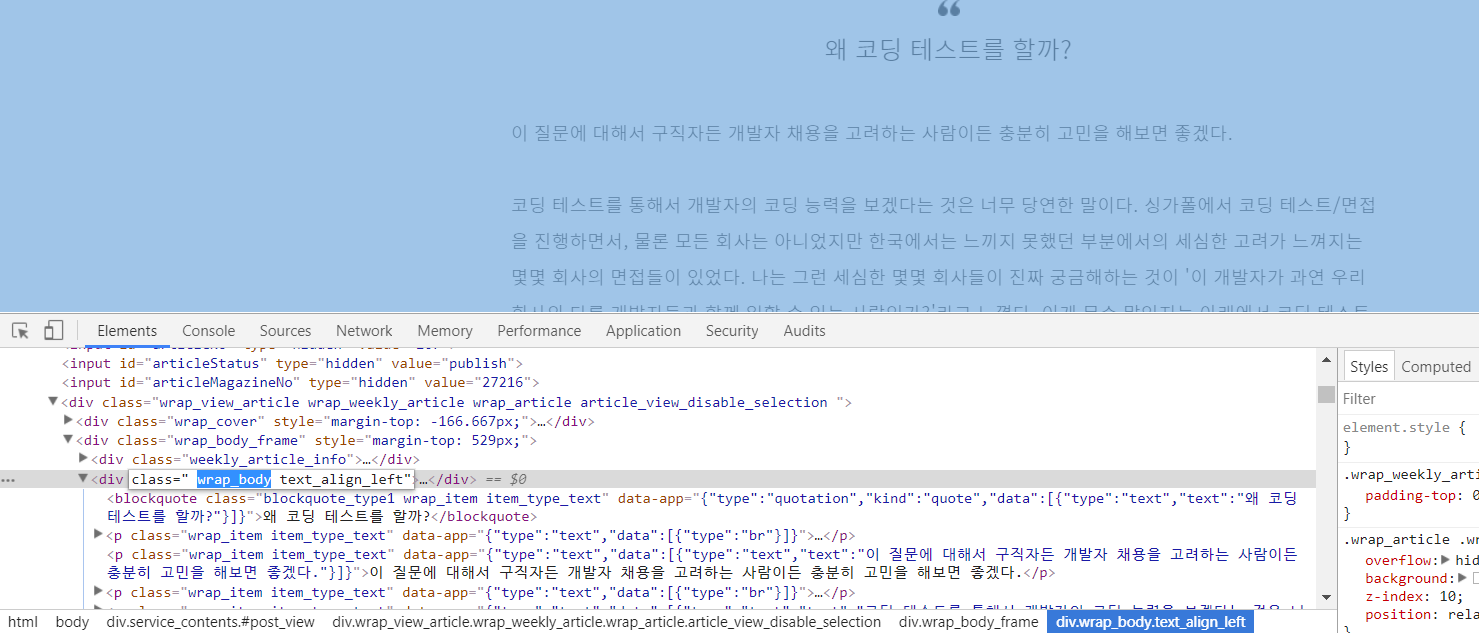

In [46]:
# Brunch 에 있는 글을 불러온다
with open('brunch.txt','w',encoding = 'utf-8') as f:
    
    all_text = source.find('div',{"class": "wrap_body"})
    article = all_text.find_all('p')
    
    for content in article:
        print(content.get_text())
        f.write(content.get_text() + '\n')


이 질문에 대해서 구직자든 개발자 채용을 고려하는 사람이든 충분히 고민을 해보면 좋겠다.

코딩 테스트를 통해서 개발자의 코딩 능력을 보겠다는 것은 너무 당연한 말이다. 싱가폴에서 코딩 테스트/면접을 진행하면서, 물론 모든 회사는 아니었지만 한국에서는 느끼지 못했던 부분에서의 세심한 고려가 느껴지는 몇몇 회사의 면접들이 있었다. 나는 그런 세심한 몇몇 회사들이 진짜 궁금해하는 것이 '이 개발자가 과연 우리 회사의 다른 개발자들과 함께 일할 수 있는 사람인가?'라고 느꼈다. 이게 무슨 말인지는 아래에서 코딩 테스트 종류에 대한 설명을 보면서 알아보도록 하자.


내가 싱가폴에서 면접을 보면서 경험했던 코딩 테스트는 크게 3가지로 구분해볼 수 있다. '코딩 인터뷰 사이트', '온라인 실시간 면접', '과제 제출 후 오프라인 추가 면접' 이렇게인데, 아래에서 각각에 대해서 조금 더 자세하게 알아보자.

1) 코딩 인터뷰 사이트: Hackerrank, Codility

코딩 인터뷰로 유명한 위의 두 사이트에 대해 다른 글에서 소개한 적이 있으니 아래 링크를 참고하면 된다.
알고리즘 공부하지 마세요. 게임하세요! | 싱가포르에서 개발자로 구직을 하고 있다. 이미 싱가포르에 집도 계약하고 계약금도 다 치렀기 때문에 뒤로 물러설 곳도 없다. 나중에 따로 정리해서 올리겠지만, 오랜만에 이력서를 정리해서 관심이 있는 회사에 보내고, 헤드헌터들과 연락하고, 스카이프로 영어 면접을 진행하고 있다. 그중에 유명한 카드 회사에서는 코딩 테스트를 보자고 해서 코딩 테스트도 봤다. 개발
brunch.co.kr/@imagineer/250

간단하게 말하면 화이트보드 코딩 테스트를 온라인으로 옮겨놨다고 생각하면 된다. 보통은 1~3시간 정도의 주어진 시간 동안 3개 정도의 문제를 푼다. 지원자는 충분히 해당 플랫폼에서 연습하고, 자기가 테스트를 진행하고 싶은 시간에 편하게 보면 된다. 질문도 할 수 없다. 그냥 못 풀면 끝이다. 이런 사이트 링크를 받았다면, 그냥 개발자로서 기본적인 컴퓨